# Week 10

This week we want to build on our results from previous weeks

In [1]:
from modules import week8 as w8
from modules import week5 as w5
from modules import week9 as w9
from modules import misc
import xarray as xr

%load_ext autoreload
%autoreload 2

In [2]:
# Loading data from file
SIC, LIC = w8.load_ice_data()
SIC = SIC.sel(time=slice('1979-01-01','2019-12-31')).compute()
LIC = LIC.sel(time=slice('1979-01-01','2019-12-31')).compute()
temperature = w8.load_temp_data().sel(time=slice('1979-01-01','2019-12-31')).compute()

# Landmask
landmask = w8.load_landmask()
landmask = landmask >= .5

# Preprocessing
SIC = (SIC.pipe(w5.yearly_average)).copy()
LIC = (LIC.pipe(w5.yearly_average)).copy()
temperature = (temperature.pipe(w5.yearly_average)).copy()
SIC_anomalous = (SIC.pipe(w5.find_anomalies)).copy()
LIC_anomalous = (LIC.pipe(w5.find_anomalies)).copy()
temperature_anomalous = (temperature.pipe(w5.find_anomalies)).copy()

# Breaking up temporally
SIC_short = SIC_anomalous.sel(time=slice('2002-01-01', '2019-12-31')).copy()
LIC_short = LIC_anomalous.sel(time=slice('2002-01-01', '2019-12-31')).copy()
temperature_short = temperature_anomalous.sel(time=slice('2002-01-01', '2019-12-31')).skt.copy()
SIC_long = SIC_anomalous.sel(time=slice('1979-01-01', '2019-12-31')).copy()
temperature_long = temperature_anomalous.sel(time=slice('1979-01-01', '2019-12-31')).skt.copy()

misc.print_heading("Preprocessing Done")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 189/189 [00:04<00:00, 40.84it/s]


----------------------------------------------------------------------------------------------------------------------
                                                 Preprocessing Done                                                  
----------------------------------------------------------------------------------------------------------------------


In [4]:
# Calculations
sic_temp_long, sic_temp_short, lic_temp_short = w8.regressions(SIC_anomalous, LIC_anomalous, temperature_anomalous, landmask)

Finding coefficients for ['skt'] against sic


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:06<00:00, 15880.09it/s]


Predicting SIC
Finding coefficients for ['skt'] against sic


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:06<00:00, 16180.05it/s]


Predicting SIC
Finding coefficients for ['skt'] against sic


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:03<00:00, 32506.13it/s]


Predicting SIC


In [6]:
sic_temp_long

<xarray.Dataset>
Dimensions:          (time: 41, x: 316, y: 332)
Coordinates:
  * time             (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2019-01-01
  * y                (y) int32 4350000 4325000 4300000 ... -3900000 -3925000
  * x                (x) int32 -3950000 -3925000 -3900000 ... 3900000 3925000
    month            int64 1
Data variables:
    sic              (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    skt              (x, y, time) float64 0.0 0.0 0.0 ... 0.3653 0.2988 -0.4652
    prediction_skt   (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    regr_coef_skt    (x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    regr_coef_error  (x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

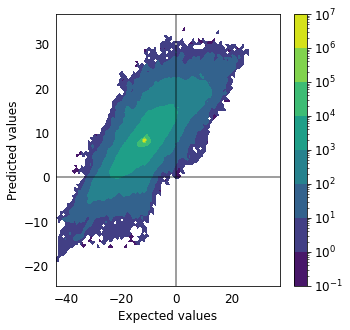

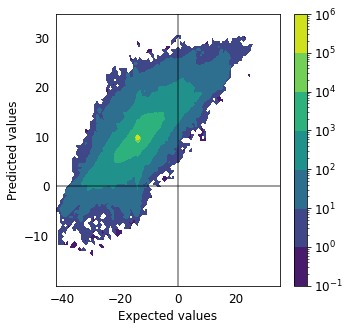

ValueError: math domain error

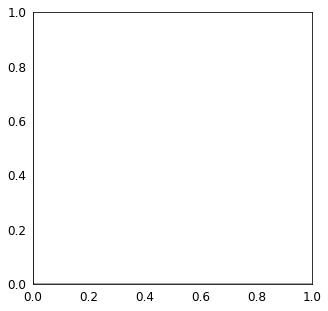

In [8]:
w8.regression_plots(sic_temp_long.where(~landmask),  SIC_long.where(~landmask),  temperature_long.where(~landmask))
w8.regression_plots(sic_temp_short.where(~landmask), SIC_short.where(~landmask), temperature_short.where(~landmask))
w8.regression_plots(lic_temp_short.where(landmask), LIC_short.where(landmask), temperature_short.where(landmask))

# Validation of datasets